# **Bar Charts,Histogram, Scatter,Bubble, Box Plots**


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib
!pip install seaborn 

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [20]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-06-13 11:27:04--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  59.4MB/s    in 2.6s    

2025-06-13 11:27:07 (59.4 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



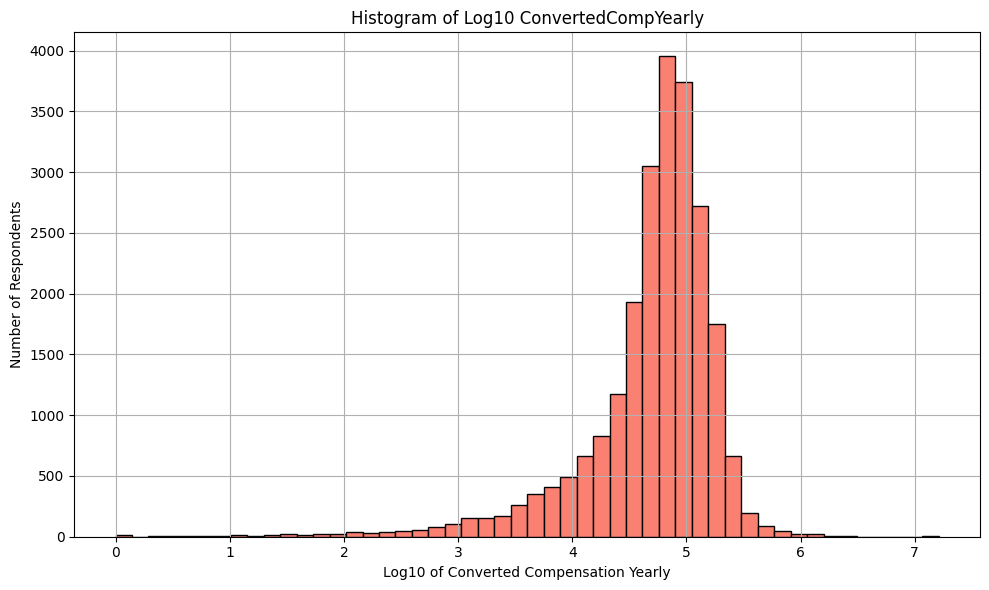

In [16]:
import numpy as np
# Step 1: Clean the compensation column
df_hist = df.copy()
df_hist['ConvertedCompYearly'] = pd.to_numeric(df_hist['ConvertedCompYearly'], errors='coerce')

# Step 2: Drop missing or unrealistic values (optional filtering)
df_hist = df_hist.dropna(subset=['ConvertedCompYearly'])
df_hist = df_hist[df_hist['ConvertedCompYearly'] > 0]  # Remove zero or negative values

# Log-transform the compensation
df_hist['LogComp'] = np.log10(df_hist['ConvertedCompYearly'])

plt.figure(figsize=(10, 6))
plt.hist(df_hist['LogComp'], bins=50, color='salmon', edgecolor='black')
plt.xlabel('Log10 of Converted Compensation Yearly')
plt.ylabel('Number of Respondents')
plt.title('Histogram of Log10 ConvertedCompYearly')
plt.grid(True)
plt.tight_layout()
plt.show()

##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



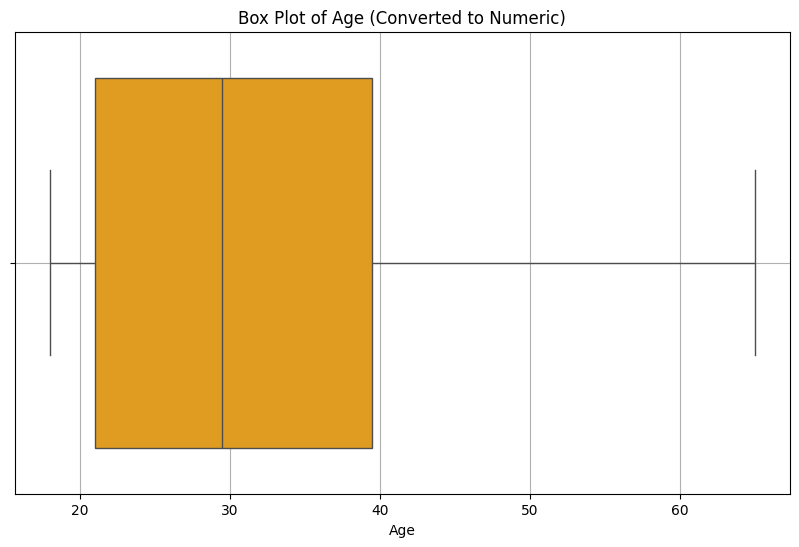

In [22]:
import numpy as np
# Map the age to midpoint of range
age_mapping = {'Under 18 years old': 18,
               '18-24 years old': (18+24)/2,
               '25-34 years old': (25+34)/2,
               '35-44 years old': (35+44)/2,
               '45-54 years old': (45+54)/2,
               '55-64 years old': (55+64)/2,
               '65 years or older': 65,
               }

df["Age_mapped"] = df["Age"].map(age_mapping)

# Drop NULL values
df = df.dropna(subset=['Age_mapped'])
df['Age_mapped'] = pd.to_numeric(df['Age_mapped'], errors='coerce')
# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age_mapped'], color='orange')

plt.xlabel('Age')
plt.title('Box Plot of Age (Converted to Numeric)')
plt.grid(True)
plt.show()

### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



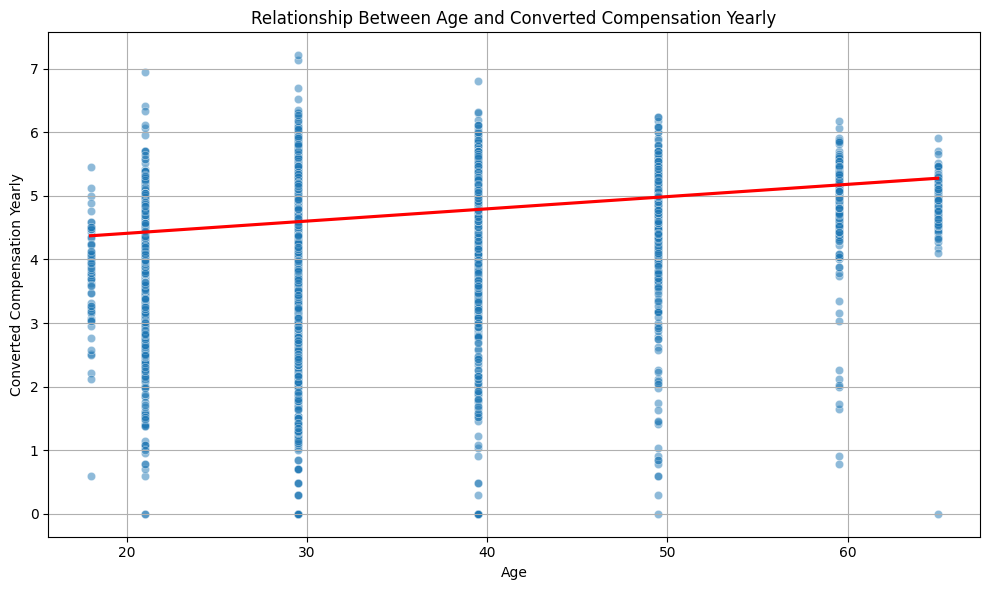

In [25]:
#  Clean the compensation column
df= df.copy()
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

#  Drop missing or unrealistic values (optional filtering)
df = df.dropna(subset=['ConvertedCompYearly'])
df = df[df['ConvertedCompYearly'] > 0]  # Remove zero or negative values

# Log-transform the compensation
df['LogComp'] = np.log10(df['ConvertedCompYearly'])

# Map the age to midpoint of range
age_mapping = {'Under 18 years old': 18,
               '18-24 years old': (18+24)/2,
               '25-34 years old': (25+34)/2,
               '35-44 years old': (35+44)/2,
               '45-54 years old': (45+54)/2,
               '55-64 years old': (55+64)/2,
               '65 years or older': 65,
               }

df["Age_mapped"] = df["Age"].map(age_mapping)

# Drop NULL values
df = df.dropna(subset=['Age_mapped'])
df['Age_numeric'] = pd.to_numeric(df['Age_mapped'], errors='coerce')

# Assuming your dataframe is named df and Age is numeric or cleaned already
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age_numeric', y='LogComp', alpha=0.5)
sns.regplot(data=df, x='Age_numeric', y='LogComp', scatter=False, color='red')

plt.title('Relationship Between Age and Converted Compensation Yearly')
plt.xlabel('Age')
plt.ylabel('Converted Compensation Yearly')


plt.grid(True)
plt.tight_layout()
plt.show()

##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSat` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


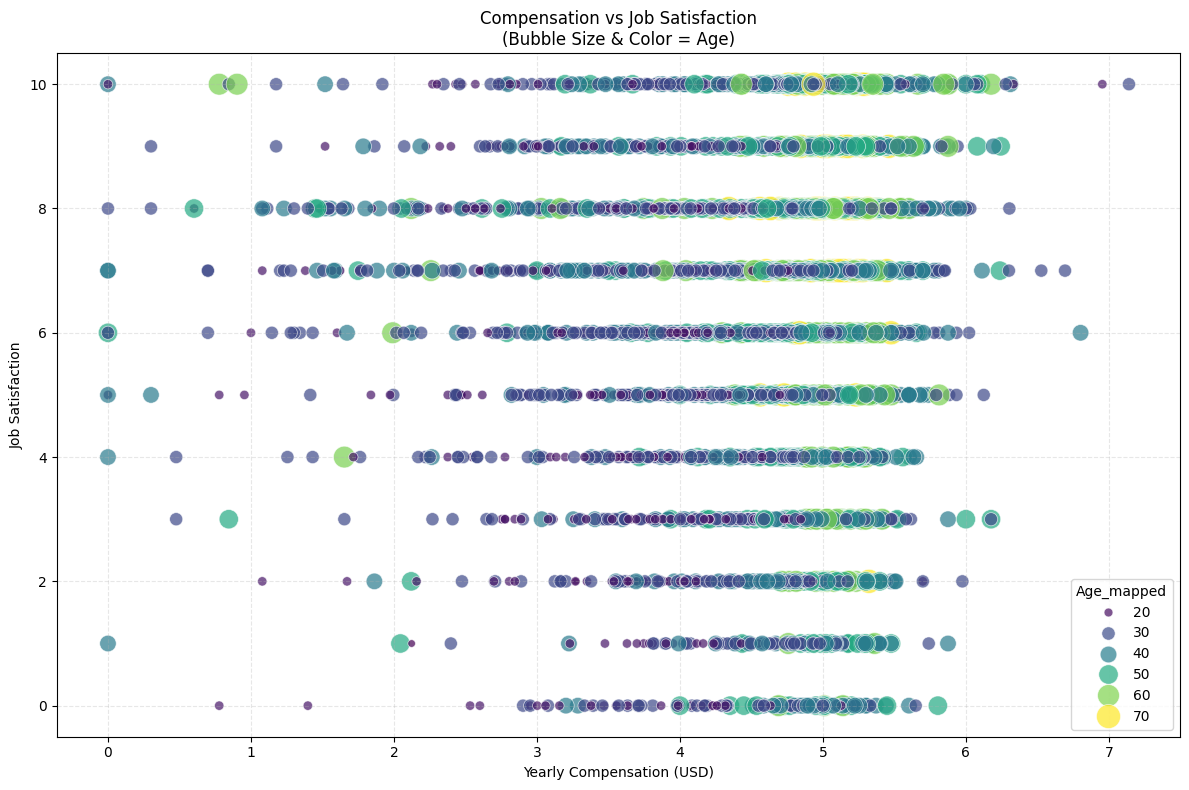

In [26]:
# --- Convert compensation to numeric (remove invalid values) ---
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df = df[df['ConvertedCompYearly'] > 0]

# --- Map age to numeric midpoints ---
age_mapping = {
    'Under 18 years old': 18,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
}
df['Age_mapped'] = df['Age'].map(age_mapping)

# --- Convert JobSat to numeric ---
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')
# Optional: Apply log scale to compensation (for wide salary range)
df['LogCompensation'] = np.log10(df['ConvertedCompYearly'])
# --- Drop rows with missing values ---
df_clean = df.dropna(subset=['LogCompensation', 'JobSat', 'Age_mapped'])

# --- Plot ---
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_clean,
    x='LogCompensation',
    y='JobSat',
    size='Age_mapped',
    hue='Age_mapped',
    sizes=(30, 300),
    palette='viridis',
    alpha=0.7,
    legend='brief'
)

plt.title('Compensation vs Job Satisfaction\n(Bubble Size & Color = Age)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



In [61]:
#Mainbranch has 2 unique values, where 'I am not primarily a developer,but I write code sometimes as part of my work/studies',
#..cannot be replaced so separated and removed by ','
# Ensure it's string type
df['MainBranch'] = df['MainBranch'].astype(str)

# Split by comma
df['MainBranch'] = df['MainBranch'].str.split(',')

# Explode to create one row per value
df = df.explode('MainBranch')

# Remove extra spaces
df['MainBranch'] = df['MainBranch'].str.strip()
# Filter out unwanted MainBranch values
df = df[df['MainBranch'] != 'but I write code sometimes as part of my work/studies']

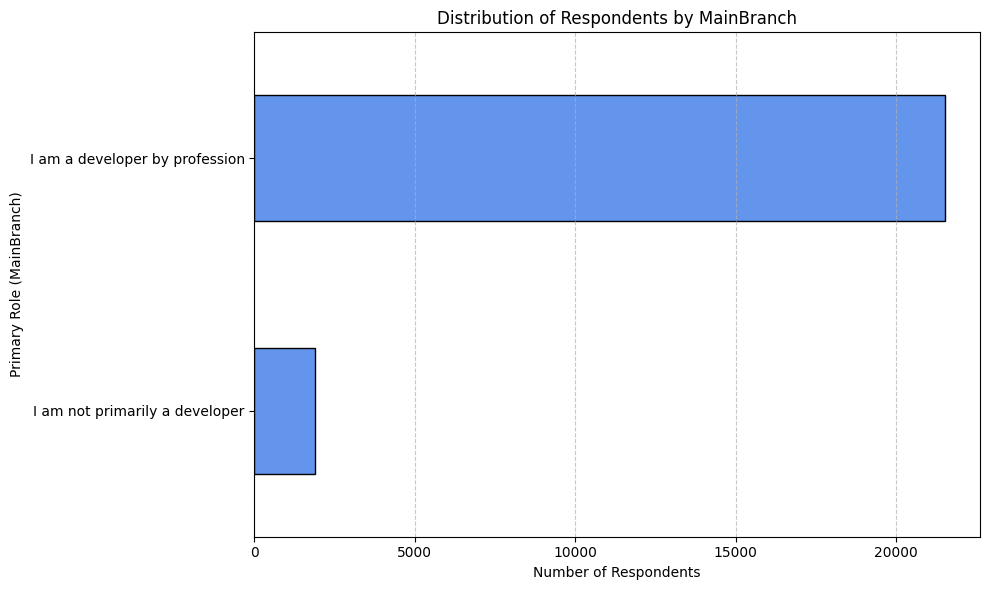

In [62]:
# Step 1: Count frequencies
mainbranch_counts = df['MainBranch'].value_counts().sort_values()

# Step 2: Plot horizontal bar chart
plt.figure(figsize=(10, 6))
mainbranch_counts.plot(kind='barh', color='cornflowerblue', edgecolor='black')

# Step 3: Add labels and title
plt.xlabel('Number of Respondents')
plt.ylabel('Primary Role (MainBranch)')
plt.title('Distribution of Respondents by MainBranch')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



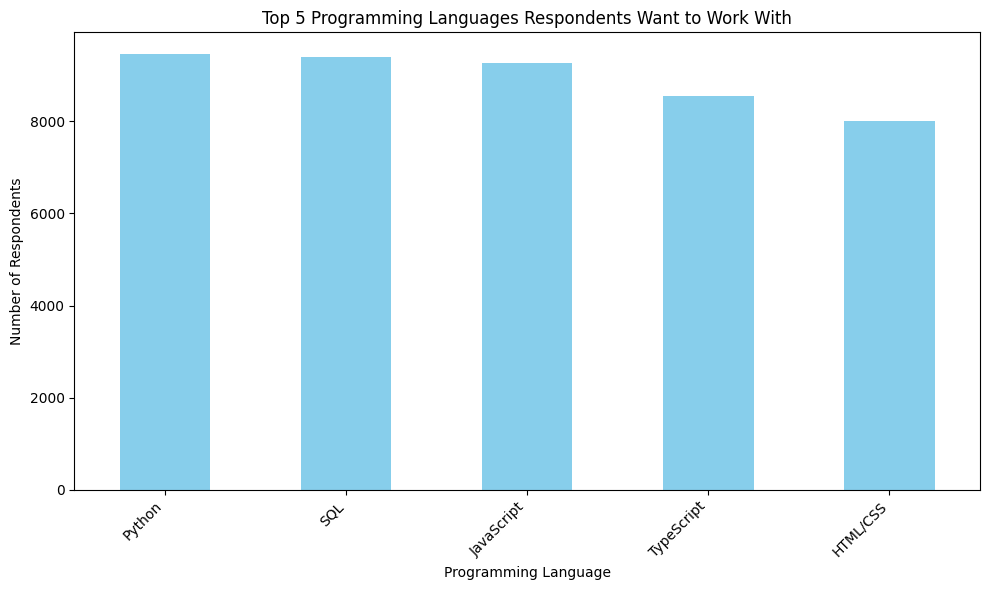

In [64]:
# Ensure string type
df['LanguageWantToWorkWith'] = df['LanguageWantToWorkWith'].astype(str)

# Split by semicolon and explode into multiple rows
df_exploded = df.assign(
    LanguageWantToWorkWith = df['LanguageWantToWorkWith'].str.split(';')
).explode('LanguageWantToWorkWith')

# Clean whitespace
df_exploded['LanguageWantToWorkWith'] = df_exploded['LanguageWantToWorkWith'].str.strip()
#Count occurrences of each language
language_counts = df_exploded['LanguageWantToWorkWith'].value_counts().head(5)
#Plot vertical bar chart
language_counts.plot(kind='bar', figsize=(10,6), color='skyblue')

plt.title('Top 5 Programming Languages Respondents Want to Work With')
plt.xlabel('Programming Language')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


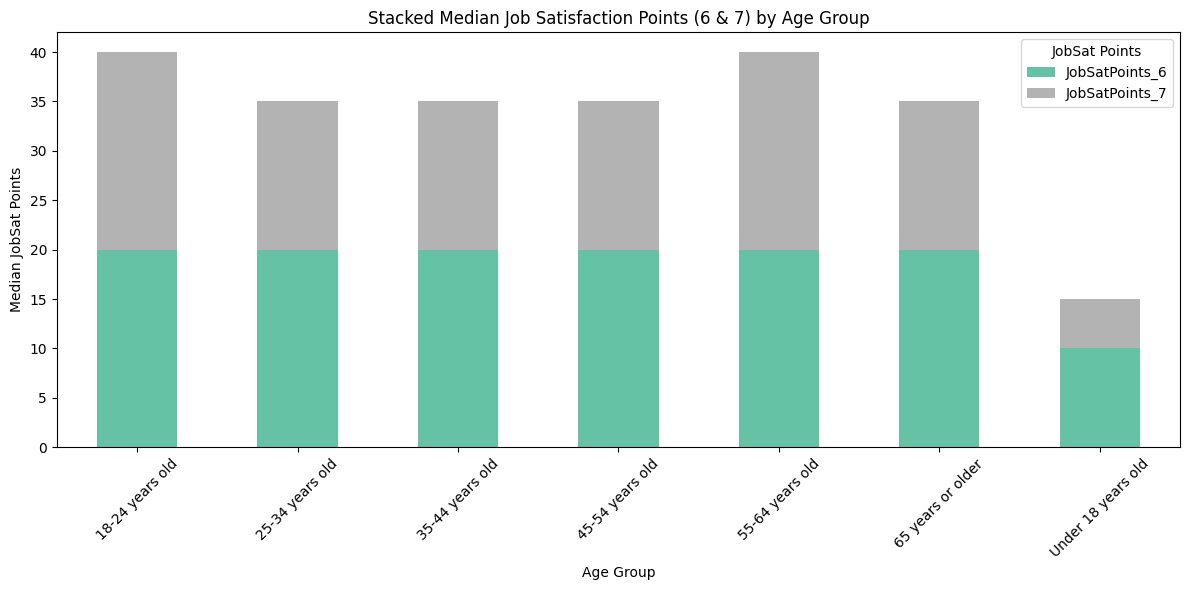

In [65]:
# Group by Age and calculate the median for JobSatPoints_6 and JobSatPoints_7
median_points = df.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Sort by age (optional, if Age is a categorical string)
median_points = median_points.loc[median_points.index.sort_values()]

# Plot
ax = median_points.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')

plt.title('Stacked Median Job Satisfaction Points (6 & 7) by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median JobSat Points')
plt.legend(title='JobSat Points')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



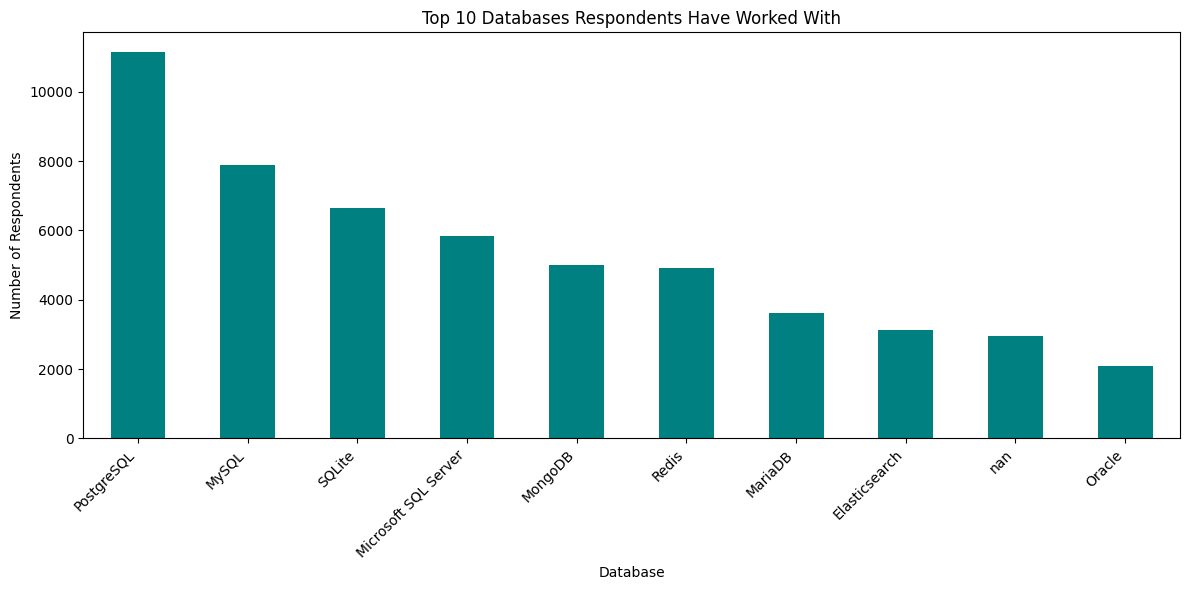

In [66]:
# Ensure it's string type
df['DatabaseHaveWorkedWith'] = df['DatabaseHaveWorkedWith'].astype(str)

# Split by semicolon and explode
df_exploded = df.assign(
    DatabaseHaveWorkedWith = df['DatabaseHaveWorkedWith'].str.split(';')
).explode('DatabaseHaveWorkedWith')

# Clean whitespace
df_exploded['DatabaseHaveWorkedWith'] = df_exploded['DatabaseHaveWorkedWith'].str.strip()
#Count database mentions
db_counts = df_exploded['DatabaseHaveWorkedWith'].value_counts()
#Plot bar chart (top 10 most popular databases)



top_dbs = db_counts.head(10)

top_dbs.plot(kind='bar', figsize=(12,6), color='teal')

plt.title('Top 10 Databases Respondents Have Worked With')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



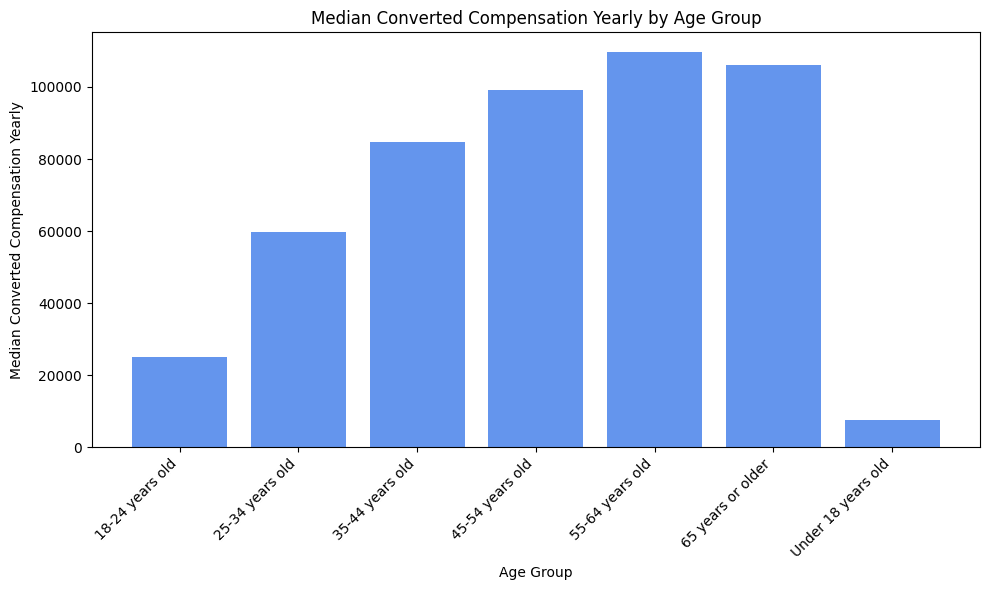

In [67]:
median_comp = df.groupby('Age')['ConvertedCompYearly'].median().reset_index()

plt.figure(figsize=(10,6))
plt.bar(median_comp['Age'], median_comp['ConvertedCompYearly'], color='cornflowerblue')

plt.title('Median Converted Compensation Yearly by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Converted Compensation Yearly')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



In [73]:
map_country = {'United States of America': 'USA',
               'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom'}
df["Country"] = df["Country"].replace(map_country)


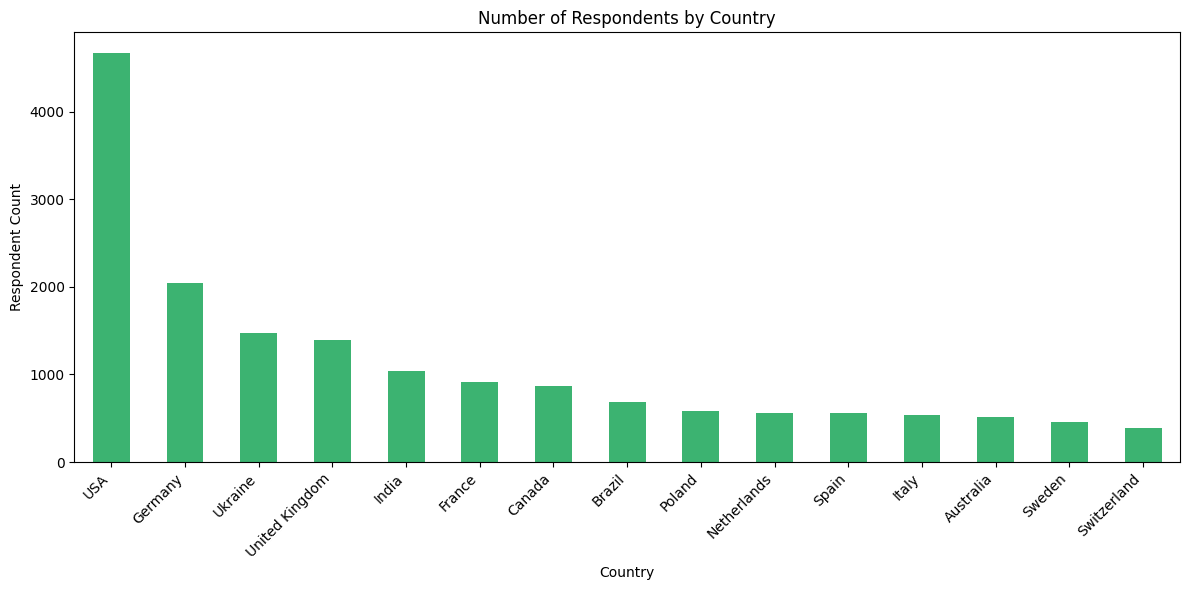

In [74]:
country_counts = df['Country'].value_counts()
# take top 15 countries for clarity
top_countries = country_counts.head(15)

plt.figure(figsize=(12,6))
top_countries.plot(kind='bar', color='mediumseagreen')

plt.title('Number of Respondents by Country')
plt.xlabel('Country')
plt.ylabel('Respondent Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()